# Machine learning
In the machine learning portion of your project, you will use algorithms and techniques to build predictive models based on your dataset. The goal is that by means of these models on previous data we can learn patterns and relationships between the input features such as vehicle specifications, mileage, etc. and the target variable (the price of the car).


The code snippet prepares the data for machine learning by splitting it into input features (X) and the target variable (y). It further divides the data into training and testing sets, with 80% for training and 20% for testing. This enables training a machine learning model on the training data and evaluating its performance on unseen testing data.

In [132]:
X = df2.drop('price', axis=1)
y = df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


The code is using linear regression, a machine learning algorithm, to predict the prices of vehicles. 

In [133]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_error = mean_squared_error(y_test, lr_pred)
lr_r2_score = r2_score(y_test, lr_pred)
print(f"Linear Regression R2 Score: {lr_r2_score}")

Linear Regression R2 Score: -48341311286.82123


C:\Users\tal66\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
C:\Users\tal66\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


In [134]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVR(kernel='linear')
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)
svm_error = mean_squared_error(y_test, svm_pred)
svm_r2_score = r2_score(y_test, svm_pred)
print(f"SVM R2 Score: {svm_r2_score}")


SVM R2 Score: 0.7755637719401544


C:\Users\tal66\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
C:\Users\tal66\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


In [135]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_error = mean_squared_error(y_test, rf_pred)
rf_r2_score = r2_score(y_test, rf_pred)
print(f"Random Forest R2 Score: {rf_r2_score}")

Random Forest R2 Score: 0.9143455643873724


C:\Users\tal66\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
C:\Users\tal66\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


In [136]:
dfExample = df2.copy()
Real_values = dfExample['price']
dfExample = dfExample.drop(columns = ['price'])
y_pred_example = rf.predict(dfExample)
dfExamplePred = pd.DataFrame({'predicted':y_pred_example.round(2),'real':Real_values})
dfExamplePred['percentage'] = ((pd.DataFrame({'min_percentage': dfExamplePred['predicted'] / dfExamplePred['real'], 'max_percentage': dfExamplePred['real'] / dfExamplePred['predicted']})).min(axis=1) * 100).round(2)

    
dfExamplePred

,predicted,real,percentage
0,33402.22,33987,98.28
1,25199.27,23973,95.13
2,26384.55,25999,98.54
7,43139.64,41999,97.36
9,43272.43,43886,98.60
...,...,...,...
8078,45899.01,48710,94.23
8079,58718.87,61750,95.09
8080,58718.87,62550,93.88
8081,44724.43,47390,94.38


In [137]:
dfExamplePred[dfExamplePred['percentage']>=95].count()

predicted     4104
real          4104
percentage    4104
dtype: int64

The code is creating a figure with three subplots to compare the true values with the predicted values of three different regression models: Linear Regression, SVM, and Random Forest. The scatter plots show the relationship between the true values (y_test) and the predicted values (lr_pred, svm_pred, rf_pred) for each model. The x-axis and y-axis are both displayed on a logarithmic scale. The blue line represents a perfect prediction, where the true values and predicted values are equal. The subplots provide a visual comparison of the performance of each model in predicting the target variable.

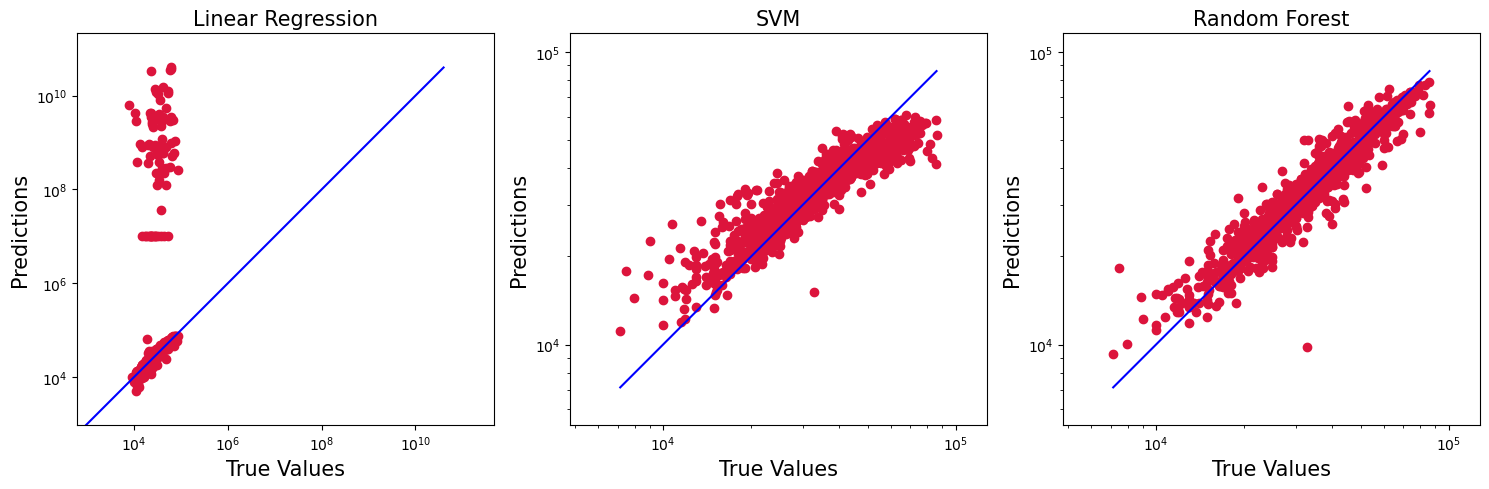

In [138]:
plt.figure(figsize=(15, 5))

# Subplot 1: Predictions before improving
plt.subplot(1, 3, 1)
plt.scatter(y_test, lr_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_test), max(lr_pred))
p2 = min(min(y_test), min(lr_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Linear Regression', fontsize=15)
plt.axis('equal')

# Subplot 2: Predictions after improving
plt.subplot(1, 3, 2)
plt.scatter(y_test, svm_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_test), max(svm_pred))
p2 = min(min(y_test), min(svm_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('SVM', fontsize=15)
plt.axis('equal')

# Subplot 3: Predictions after super improving
plt.subplot(1, 3, 3)
plt.scatter(y_test, rf_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_test), max(rf_pred))
p2 = min(min(y_test), min(rf_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Random Forest', fontsize=15)
plt.axis('equal')

plt.tight_layout()
plt.show()